# 安装paddle及paddleNLP

In [8]:
!nvidia-smi

Tue May 24 22:32:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:0B.0 Off |                    0 |
| N/A   34C    P0    40W / 300W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
%cd ~
!pip install --upgrade paddlenlp
# %cd ~/work/
# !git clone https://gitee.com/paddlepaddle/PaddleNLP.git
# %cd ~/work/PaddleNLP/
# !pip install -r requirements.txt
# !python setup.py install
!pip install pypinyin
!pip install LAC
#  upgrade之后要restart
!python -m pip install paddlepaddle-gpu==0.0.0.post101 -f https://www.paddlepaddle.org.cn/whl/linux/gpu/develop.html


/home/aistudio
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/gpu/develop.html


# 一键预测
基于PaddleNLP Taskflow一键预测功能进行5个任务，分别为：
信息抽取、中文分词、词性标注、命名实体识别以及依存句法分析。


**实体识别**

# 错误记录：

执行以下代码：

    from paddlenlp import Taskflow
    ner = Taskflow("ner")
    ner("我在马路边，捡到一分钱")

错误如下：

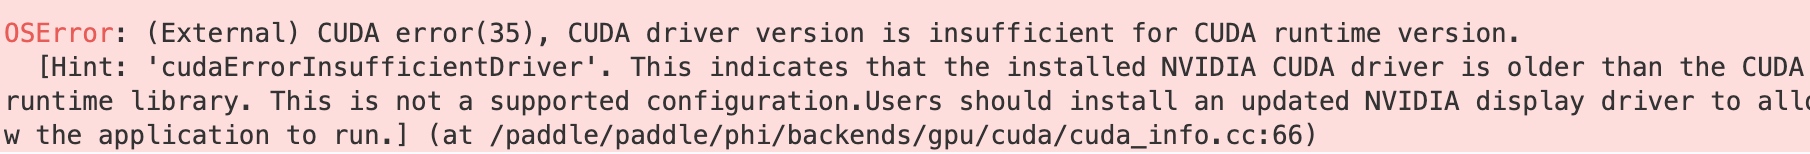

原因：
 upgrade 或者setup paddleNLP之后要restart，在AiStudio中需要restart之后安装paddle


 

In [5]:
from paddlenlp import Taskflow
ner = Taskflow("ner")
ner("我在马路边，捡到一分钱")

[2022-05-25 01:06:24,652] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/wordtag/vocab.txt


[('我', '代词'),
 ('在', '介词'),
 ('马路边', '位置方位'),
 ('，', 'w'),
 ('捡到', '场景事件'),
 ('一分钱', '数量词')]

**信息抽取**

可以使用自然语言自定义抽取目标，在实体、关系类别等未定义的情况下抽取输入文本中的信息片段。

In [6]:
from pprint import pprint
from paddlenlp import Taskflow

schema = ['时间', '地点', '病例数量','本土病例','境外输入','死亡病例'] # Define the schema for entity extraction
ie = Taskflow('information_extraction', schema=schema)
pprint(ie("5月21日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例169例。其中境外输入病例12例（福建7例，广西2例，云南2例，上海1例）；本土病例157例（北京52例，上海52例，天津36例，四川12例，河南3例，广东1例，陕西1例），含45例由无症状感染者转为确诊病例（上海29例，天津12例，四川3例，北京1例）。新增死亡病例3例，均为本土病例，在上海；无新增疑似病例。")) 

[2022-05-23 19:13:27,565] [    INFO] - We are using <class 'paddlenlp.transformers.ernie.tokenizer.ErnieTokenizer'> to load 'ernie-3.0-base-zh'.
[2022-05-23 19:13:27,568] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ernie-3.0-base-zh/ernie_3.0_base_zh_vocab.txt


[{'地点': [{'end': 70,
          'probability': 0.3385908203652157,
          'start': 68,
          'text': '云南'},
         {'end': 124,
          'probability': 0.2559041915331157,
          'start': 122,
          'text': '陕西'},
         {'end': 65,
          'probability': 0.39798793985184133,
          'start': 63,
          'text': '广西'},
         {'end': 119,
          'probability': 0.28335505859861243,
          'start': 117,
          'text': '广东'},
         {'end': 60,
          'probability': 0.43413248045488473,
          'start': 58,
          'text': '福建'},
         {'end': 114,
          'probability': 0.32793601925828497,
          'start': 112,
          'text': '河南'},
         {'end': 108,
          'probability': 0.36465495858163877,
          'start': 106,
          'text': '四川'},
         {'end': 90,
          'probability': 0.35189155196900046,
          'start': 88,
          'text': '北京'},
         {'end': 96,
          'probability': 0.26568316698050864,
       

**中文分词**

In [6]:
from paddlenlp import Taskflow

# 默认模式————实体粒度分词，在精度和速度上的权衡，基于百度LAC
seg = Taskflow("word_segmentation")
seg("近日国家卫健委发布第九版新型冠状病毒肺炎诊疗方案")

[2022-05-25 01:06:32,883] [    INFO] - Downloading model_state.pdparams from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/model_state.pdparams
100%|██████████| 32.3M/32.3M [00:00<00:00, 47.0MB/s]
[2022-05-25 01:06:33,783] [    INFO] - Downloading tag.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/tag.dic
100%|██████████| 425/425 [00:00<00:00, 435kB/s]
[2022-05-25 01:06:33,852] [    INFO] - Downloading q2b.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/q2b.dic
100%|██████████| 44.1k/44.1k [00:00<00:00, 2.09MB/s]
[2022-05-25 01:06:33,936] [    INFO] - Downloading word.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/word.dic
100%|██████████| 745k/745k [00:00<00:00, 3.10MB/s]
[2022-05-25 01:06:34,434] [    INFO] - Converting to the inference model cost a little time.
[2022-05-25 01:06:34,756] [    INFO] - The inference model save in the path:/home/aistudio/.paddlenlp/taskflow/lac/static/inference


['近日', '国家卫健委', '发布', '第九版', '新型', '冠状病毒肺炎', '诊疗', '方案']

In [10]:
from paddlenlp import Taskflow

# 默认模式————实体粒度分词，在精度和速度上的权衡，基于百度LAC
seg = Taskflow("word_segmentation")
seg("近日国家卫健委发布第九版新型冠状病毒肺炎诊疗方案")



[2022-05-23 22:57:08,355] [    INFO] - Downloading model_state.pdparams from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/model_state.pdparams
100%|██████████| 32.3M/32.3M [00:01<00:00, 23.0MB/s]
[2022-05-23 22:57:10,083] [    INFO] - Downloading tag.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/tag.dic
100%|██████████| 425/425 [00:00<00:00, 289kB/s]
[2022-05-23 22:57:10,165] [    INFO] - Downloading q2b.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/q2b.dic
100%|██████████| 44.1k/44.1k [00:00<00:00, 4.28MB/s]
[2022-05-23 22:57:10,291] [    INFO] - Downloading word.dic from https://bj.bcebos.com/paddlenlp/taskflow/lexical_analysis/lac/word.dic
100%|██████████| 745k/745k [00:00<00:00, 2.14MB/s]
[2022-05-23 22:57:10,920] [    INFO] - Converting to the inference model cost a little time.
[2022-05-23 22:57:11,264] [    INFO] - The inference model save in the path:/home/aistudio/.paddlenlp/taskflow/lac/static/inference


['近日', '国家卫健委', '发布', '第九版', '新型', '冠状病毒肺炎', '诊疗', '方案']

**词性标注**

In [13]:
from paddlenlp import Taskflow
tag = Taskflow("pos_tagging")
print(tag("近日，小麦陆续进入成熟期，我国从南到北陆续开镰，各地抓实抓细夏收夏种夏管各项工作，确保夏粮颗粒归仓，夯实全年粮食生产基础。 "))

[('近日', 'TIME'), ('，', 'w'), ('小麦', 'n'), ('陆续', 'd'), ('进入', 'v'), ('成熟期', 'n'), ('，', 'w'), ('我', 'r'), ('国', 'n'), ('从', 'p'), ('南', 'f'), ('到', 'v'), ('北', 'f'), ('陆续', 'd'), ('开镰', 'v'), ('，', 'w'), ('各地', 'n'), ('抓实', 'v'), ('抓', 'v'), ('细', 'a'), ('夏', 'TIME'), ('收夏', 'v'), ('种', 'v'), ('夏管', 'n'), ('各项', 'r'), ('工作', 'n'), ('，', 'w'), ('确保', 'v'), ('夏粮', 'nz'), ('颗粒', 'n'), ('归仓', 'v'), ('，', 'w'), ('夯实', 'v'), ('全年', 'TIME'), ('粮食', 'n'), ('生产', 'vn'), ('基础', 'n'), ('。', 'w'), (' ', 'w')]


**文本纠错**

In [20]:
from paddlenlp import Taskflow
corrector = Taskflow("text_correction")
# 单条输入
corrector('清华回应女搏士抱考协警:查无此人')

[2022-05-23 23:13:57,552] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ernie-1.0/vocab.txt


[{'source': '清华回应女搏士抱考协警:查无此人',
  'target': '清华回应女搏士抱烤协警:查无此人',
  'errors': [{'position': 8, 'correction': {'考': '烤'}}]}]

***以上问题：没有修改正确***


# 使用预训练模型完成情感分析任务

## 加载数据集

In [2]:
import paddlenlp as ppnlp
from paddlenlp.datasets import load_dataset

train_ds, dev_ds, test_ds = load_dataset(
    "chnsenticorp", splits=["train", "dev", "test"])
print(train_ds.label_list)
for data in train_ds.data[:5]:
    print(data)

100%|██████████| 1909/1909 [00:00<00:00, 6444.37it/s]


['0', '1']
{'text': '选择珠江花园的原因就是方便，有电动扶梯直接到达海边，周围餐馆、食廊、商场、超市、摊位一应俱全。酒店装修一般，但还算整洁。 泳池在大堂的屋顶，因此很小，不过女儿倒是喜欢。 包的早餐是西式的，还算丰富。 服务吗，一般', 'label': 1, 'qid': ''}
{'text': '15.4寸笔记本的键盘确实爽，基本跟台式机差不多了，蛮喜欢数字小键盘，输数字特方便，样子也很美观，做工也相当不错', 'label': 1, 'qid': ''}
{'text': '房间太小。其他的都一般。。。。。。。。。', 'label': 0, 'qid': ''}
{'text': '1.接电源没有几分钟,电源适配器热的不行. 2.摄像头用不起来. 3.机盖的钢琴漆，手不能摸，一摸一个印. 4.硬盘分区不好办.', 'label': 0, 'qid': ''}
{'text': '今天才知道这书还有第6卷,真有点郁闷:为什么同一套书有两种版本呢?当当网是不是该跟出版社商量商量,单独出个第6卷,让我们的孩子不会有所遗憾。', 'label': 1, 'qid': ''}


In [3]:
train_ds

**调用ppnlp.transformers.PP-MiniLM进行数据处理**

## 调用ppnlp.transformers.PPMiniLMTokenizer进行数据处理

In [4]:
# 定义ppminilm中文模型
import paddlenlp as ppnlp
from paddlenlp.datasets import load_dataset
MODEL_NAME = "ppminilm-6l-768h"
tokenizer = ppnlp.transformers.PPMiniLMTokenizer.from_pretrained(MODEL_NAME)
PPMiniLM_model = ppnlp.transformers.PPMiniLMModel.from_pretrained(MODEL_NAME)


[2022-05-25 01:08:50,626] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/vocab.txt
[2022-05-25 01:08:50,641] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams
[2022-05-25 01:08:50,643] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/vocab.txt
W0525 01:08:50.655170  1930 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0525 01:08:50.659930  1930 gpu_resources.cc:91] device: 0, cuDNN Version: 7.6.
[2022-05-25 01:08:56,343] [    INFO] - Loaded parameters from /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams


**文本测试**

In [5]:
import paddle

# 将原始输入文本切分token，
tokens = tokenizer._tokenize("请输入测试样例")
print("Tokens: {}".format(tokens))

# token映射为对应token id
tokens_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Tokens id: {}".format(tokens_ids))


# 拼接上预训练模型对应的特殊token ，如[CLS]、[SEP]
tokens_ids = tokenizer.build_inputs_with_special_tokens(tokens_ids)

# 转化成paddle框架数据格式
tokens_pd = paddle.to_tensor([tokens_ids])
print("Tokens : {}".format(tokens_pd))

# 此时即可输入ERNIE模型中得到相应输出
sequence_output, pooled_output = PPMiniLM_model(tokens_pd)
print("Token wise output: {}, Pooled output: {}".format(sequence_output.shape, pooled_output.shape))

Tokens: ['请', '输', '入', '测', '试', '样', '例']
Tokens id: [6435, 6783, 1057, 3844, 6407, 3416, 891]
Tokens : Tensor(shape=[1, 9], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[101 , 6435, 6783, 1057, 3844, 6407, 3416, 891 , 102 ]])
Token wise output: [1, 9, 768], Pooled output: [1, 768]


In [6]:
# 一行代码完成切分token，映射token ID以及拼接特殊token
encoded_text = tokenizer(text="请输入测试样例")
for key, value in encoded_text.items():
    print("{}:\n\t{}".format(key, value))

# 转化成paddle框架数据格式
input_ids = paddle.to_tensor([encoded_text['input_ids']])
print("input_ids : {}".format(input_ids))
segment_ids = paddle.to_tensor([encoded_text['token_type_ids']])
print("token_type_ids : {}".format(segment_ids))

# 此时即可输入ERNIE模型中得到相应输出
sequence_output, pooled_output = PPMiniLM_model(input_ids, segment_ids)
print("Token wise output: {}, Pooled output: {}".format(sequence_output.shape, pooled_output.shape))

input_ids:
	[101, 6435, 6783, 1057, 3844, 6407, 3416, 891, 102]
token_type_ids:
	[0, 0, 0, 0, 0, 0, 0, 0, 0]
input_ids : Tensor(shape=[1, 9], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[101 , 6435, 6783, 1057, 3844, 6407, 3416, 891 , 102 ]])
token_type_ids : Tensor(shape=[1, 9], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[0, 0, 0, 0, 0, 0, 0, 0, 0]])
Token wise output: [1, 9, 768], Pooled output: [1, 768]


In [7]:
# 单句输入
single_seg_input = tokenizer(text="请输入测试样例")
# 句对输入
multi_seg_input = tokenizer(text="请输入测试样例1", text_pair="请输入测试样例2")

print("单句输入token (str): {}".format(tokenizer.convert_ids_to_tokens(single_seg_input['input_ids'])))
print("单句输入token (int): {}".format(single_seg_input['input_ids']))
print("单句输入segment ids : {}".format(single_seg_input['token_type_ids']))

print()
print("句对输入token (str): {}".format(tokenizer.convert_ids_to_tokens(multi_seg_input['input_ids'])))
print("句对输入token (int): {}".format(multi_seg_input['input_ids']))
print("句对输入segment ids : {}".format(multi_seg_input['token_type_ids']))

单句输入token (str): ['[CLS]', '请', '输', '入', '测', '试', '样', '例', '[SEP]']
单句输入token (int): [101, 6435, 6783, 1057, 3844, 6407, 3416, 891, 102]
单句输入segment ids : [0, 0, 0, 0, 0, 0, 0, 0, 0]

句对输入token (str): ['[CLS]', '请', '输', '入', '测', '试', '样', '例', '1', '[SEP]', '请', '输', '入', '测', '试', '样', '例', '2', '[SEP]']
句对输入token (int): [101, 6435, 6783, 1057, 3844, 6407, 3416, 891, 122, 102, 6435, 6783, 1057, 3844, 6407, 3416, 891, 123, 102]
句对输入segment ids : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
# Highlight: padding到统一长度
encoded_text = tokenizer(text="请输入测试样例",  max_seq_len=15)

for key, value in encoded_text.items():
    print("{}:\n\t{}".format(key, value))

input_ids:
	[101, 6435, 6783, 1057, 3844, 6407, 3416, 891, 102]
token_type_ids:
	[0, 0, 0, 0, 0, 0, 0, 0, 0]


## 数据读入

In [9]:
%cd ~/work/PaddleNLP/
import utils_Copy1 as ut
from functools import partial
from paddlenlp.data import Stack, Tuple, Pad

# 模型运行批处理大小
batch_size = 32
max_seq_length = 128

trans_func = partial(
    ut.convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length)
batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # segment
    Stack(dtype="int64")  # label
): [data for data in fn(samples)]
train_data_loader = ut.create_dataloader(
    train_ds,
    mode='train',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)
dev_data_loader = ut.create_dataloader(
    dev_ds,
    mode='dev',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)


/home/aistudio/work/PaddleNLP


## PaddleNLP一键加载预训练模型

In [10]:
ppminilm_model = ppnlp.transformers.PPMiniLMModel.from_pretrained(MODEL_NAME)
model = ppnlp.transformers.PPMiniLMForSequenceClassification.from_pretrained(MODEL_NAME, num_classes=len(train_ds.label_list))

[2022-05-25 01:09:17,056] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams
[2022-05-25 01:09:17,058] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/vocab.txt
[2022-05-25 01:09:17,500] [    INFO] - Loaded parameters from /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams
[2022-05-25 01:09:17,612] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams
[2022-05-25 01:09:17,614] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/vocab.txt
[2022-05-25 01:09:18,347] [    INFO] - Loaded parameters from /home/aistudio/.paddlenlp/models/ppminilm-6l-768h/ppminilm-6l-768h.pdparams


In [14]:
from paddlenlp.transformers import LinearDecayWithWarmup

# 训练过程中的最大学习率
learning_rate = 5e-5 
# 训练轮次
epochs = 1 #3
# 学习率预热比例
warmup_proportion = 0.1
# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.01

num_training_steps = len(train_data_loader) * epochs
lr_scheduler = LinearDecayWithWarmup(learning_rate, num_training_steps, warmup_proportion)
optimizer = paddle.optimizer.AdamW(
    learning_rate=lr_scheduler,
    parameters=model.parameters(),
    weight_decay=weight_decay,
    apply_decay_param_fun=lambda x: x in [
        p.name for n, p in model.named_parameters()
        if not any(nd in n for nd in ["bias", "norm"])
    ])

criterion = paddle.nn.loss.CrossEntropyLoss()
metric = paddle.metric.Accuracy()


## 模型训练与评估

In [11]:
# checkpoint文件夹用于保存训练模型
!mkdir /home/aistudio/checkpoint

mkdir: 无法创建目录"/home/aistudio/checkpoint": 文件已存在


In [15]:
%cd ~/work/PaddleNLP/
from utils_Copy1 import evaluate
import paddle.nn.functional as F
# from ut1 import evaluate
# from utils import evaluate

global_step = 0
for epoch in range(1, epochs + 1):
    for step, batch in enumerate(train_data_loader, start=1):
        input_ids, segment_ids, labels = batch
        logits = model(input_ids, segment_ids)
        loss = criterion(logits, labels)
        probs = F.softmax(logits, axis=1)
        correct = metric.compute(probs, labels)
        metric.update(correct)
        acc = metric.accumulate()

        global_step += 1
        if global_step % 10 == 0 :
            print("global step %d, epoch: %d, batch: %d, loss: %.5f, acc: %.5f" % (global_step, epoch, step, loss, acc))
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.clear_grad()
    evaluate(model, criterion, metric, dev_data_loader)

model.save_pretrained('/home/aistudio/checkpoint')
tokenizer.save_pretrained('/home/aistudio/checkpoint')

/home/aistudio/work/PaddleNLP
global step 10, epoch: 1, batch: 10, loss: 0.70184, acc: 0.53438
global step 20, epoch: 1, batch: 20, loss: 0.39402, acc: 0.65312
global step 30, epoch: 1, batch: 30, loss: 0.48798, acc: 0.70937
global step 40, epoch: 1, batch: 40, loss: 0.55012, acc: 0.74141
global step 50, epoch: 1, batch: 50, loss: 0.25177, acc: 0.76438
global step 60, epoch: 1, batch: 60, loss: 0.18539, acc: 0.78802
global step 70, epoch: 1, batch: 70, loss: 0.26867, acc: 0.80402
global step 80, epoch: 1, batch: 80, loss: 0.27133, acc: 0.81797
global step 90, epoch: 1, batch: 90, loss: 0.31349, acc: 0.82326
global step 100, epoch: 1, batch: 100, loss: 0.24874, acc: 0.83375
global step 110, epoch: 1, batch: 110, loss: 0.07696, acc: 0.84176
global step 120, epoch: 1, batch: 120, loss: 0.34580, acc: 0.84557
global step 130, epoch: 1, batch: 130, loss: 0.08333, acc: 0.85168
global step 140, epoch: 1, batch: 140, loss: 0.09353, acc: 0.85692
global step 150, epoch: 1, batch: 150, loss: 0.430

[2022-05-25 01:10:50,185] [    INFO] - tokenizer config file saved in /home/aistudio/checkpoint/tokenizer_config.json
[2022-05-25 01:10:50,188] [    INFO] - Special tokens file saved in /home/aistudio/checkpoint/special_tokens_map.json


('/home/aistudio/checkpoint/tokenizer_config.json',
 '/home/aistudio/checkpoint/special_tokens_map.json',
 '/home/aistudio/checkpoint/added_tokens.json')

## 模型预测

训练保存好的训练，即可用于预测。如以下示例代码自定义预测数据，调用predict()函数即可一键预测

In [16]:
%cd ~/work/PaddleNLP/
from utils_Copy1 import predict

data = [
    {"text":'这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般'},
    {"text":'怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片'},
    {"text":'作为老的四星酒店，房间依然很整洁，相当不错。机场接机服务很好，可以在车上办理入住手续，节省时间。'},
]
label_map = {0: 'negative', 1: 'positive'}

results = predict(
    model, data, tokenizer, label_map, batch_size=batch_size)
for idx, text in enumerate(data):
    print('Data: {} \t Lable: {}'.format(text, results[idx]))

/home/aistudio/work/PaddleNLP
Data: {'text': '这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般'} 	 Lable: negative
Data: {'text': '怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片'} 	 Lable: negative
Data: {'text': '作为老的四星酒店，房间依然很整洁，相当不错。机场接机服务很好，可以在车上办理入住手续，节省时间。'} 	 Lable: positive


结果示意如下：
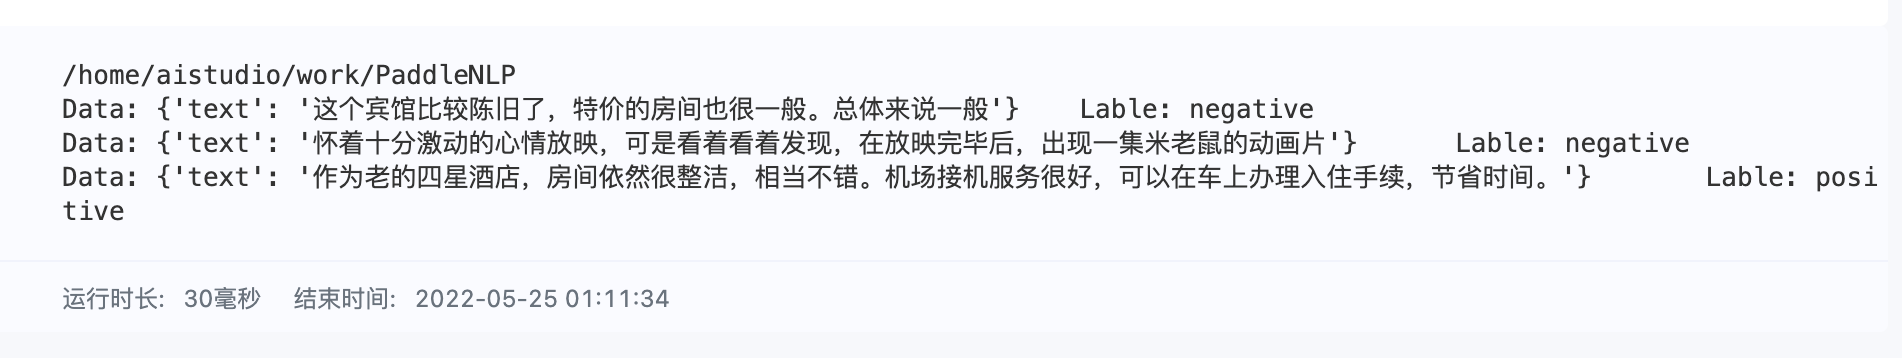